## Bamboo Weekly 8 | Happiness
Which country's residents report being the happiest? Which countries have gotten happier in the last year, and which have gotten less happy?

Source: https://www.bambooweekly.com/p/bw-8-happiness

In [76]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
print("Setup Complete")

Setup Complete


In [13]:
# Fetch data
url_happiness = "https://happiness-report.s3.amazonaws.com/2023/DataForTable2.1WHR2023.xls"
filename, _ = urlretrieve(url_happiness, filename="data/DataForTable2.1WHR2023.xls")

In [308]:
# Read xls
df_happiness = pd.read_excel(filename, sheet_name="Sheet1")
df_happiness.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919


In [78]:
# Check info
df_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   Life Ladder                       2199 non-null   float64
 3   Log GDP per capita                2179 non-null   float64
 4   Social support                    2186 non-null   float64
 5   Healthy life expectancy at birth  2145 non-null   float64
 6   Freedom to make life choices      2166 non-null   float64
 7   Generosity                        2126 non-null   float64
 8   Perceptions of corruption         2083 non-null   float64
 9   Positive affect                   2175 non-null   float64
 10  Negative affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


In [79]:
# describe dataframe
df_happiness.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000
mean,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195,0.652143,0.271501
std,4.718736,1.125529,1.153387,0.120952,6.901104,0.140150,0.161083,0.185837,0.105922,0.086875
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737
25%,2010.000000,4.646750,8.499764,0.746609,59.119999,0.656528,-0.112116,0.688139,0.571684,0.207660
50%,2014.000000,5.432437,9.498955,0.835535,65.050003,0.769821,-0.022671,0.799654,0.663063,0.260671
75%,2018.000000,6.309460,10.373216,0.904792,68.500000,0.859382,0.092070,0.868827,0.737936,0.322894
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590


In [164]:
# Q2-The main measure in the World Happiness Report is known as "life ladder," 
# where people are asked where they currently are, on a scale from 1 to 10 — 
# where 10 is the happiest possible life. According to this measure in 2022, which 10 countries are happiest?

df_happiness_top_10 = (df_happiness
                       .nlargest(n=10, columns=["Life Ladder"])
                       .sort_values(by=["Life Ladder", "year"], ascending=[False, True])
                    )
df_happiness_top_10

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
505,Denmark,2005,8.018934,10.849012,0.972372,68.300003,0.971135,NaN,0.236522,0.776689,0.153672
507,Denmark,2008,7.970892,10.877718,0.953912,68.959999,0.969788,0.267880,0.247505,0.759462,0.163091
635,Finland,2020,7.889350,10.767303,0.961621,71.074997,0.962424,-0.121018,0.163636,0.747939,0.192898
633,Finland,2018,7.858107,10.779966,0.962155,70.925003,0.937807,-0.131462,0.198605,0.748826,0.181781
506,Denmark,2007,7.834233,10.888726,0.954201,68.739998,0.932086,0.235808,0.206006,0.777936,0.194324
636,Finland,2021,7.794378,10.794529,0.970289,71.150002,0.963190,-0.037467,0.191754,0.751612,0.175449
632,Finland,2017,7.788252,10.769960,0.963826,70.849998,0.962199,-0.006553,0.192413,0.755858,0.176066
510,Denmark,2011,7.788232,10.845314,0.961736,69.620003,0.934760,0.293352,0.220043,0.777892,0.174883
634,Finland,2019,7.780348,10.791038,0.937416,71.000000,0.947617,-0.055773,0.195338,0.732282,0.180733
1868,Switzerland,2012,7.776209,11.107383,0.946864,71.519997,0.945428,0.132033,0.323241,0.792705,0.176007


In [231]:
# Q3-The WHR actually calculates happiness by averaging the results from the three most recent years (i.e., 2020, 2021, and 2022).
# Given that measure, what are the 10 happiest countries in the world?
df_happiness_sorted = df_happiness.sort_values(by=["Country name", "year"], ascending=[True, False]).reset_index(drop=True).copy()
# df_happiness_sorted

df_by_country = (
    df_happiness_sorted.groupby(by=["Country name", "year"], as_index=True)
    .first()
    .sort_index(level=["Country name", "year"], ascending=[True, False])
)

# df_by_country
df_happiness_sorted["life_ladder_3yr_ma"] = (
    df_by_country["Life Ladder"]
    .rolling(window=3, min_periods=1)
    .mean()
    .reset_index(drop=True)
)

df_happiness_sorted.nlargest(n=10, columns=["life_ladder_3yr_ma"])
# Denmark and Finland is on the Top 10 even if we do moving average

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,life_ladder_3yr_ma
521,Denmark,2005,8.018934,10.849012,0.972372,68.300003,0.971135,NaN,0.236522,0.776689,0.153672,7.941353
627,Finland,2018,7.858107,10.779966,0.962155,70.925003,0.937807,-0.131462,0.198605,0.748826,0.181781,7.842602
520,Denmark,2007,7.834233,10.888726,0.954201,68.739998,0.932086,0.235808,0.206006,0.777936,0.194324,7.829495
626,Finland,2019,7.780348,10.791038,0.937416,71.000000,0.947617,-0.055773,0.195338,0.732282,0.180733,7.821359
628,Finland,2017,7.788252,10.769960,0.963826,70.849998,0.962199,-0.006553,0.192413,0.755858,0.176066,7.808902
519,Denmark,2008,7.970892,10.877718,0.953912,68.959999,0.969788,0.267880,0.247505,0.759462,0.163091,7.808255
625,Finland,2020,7.889350,10.767303,0.961621,71.074997,0.962424,-0.121018,0.163636,0.747939,0.192898,7.804242
629,Finland,2016,7.659843,10.740882,0.953940,70.775002,0.948372,-0.031104,0.249660,0.768806,0.181998,7.768734
518,Denmark,2009,7.683359,10.822057,0.938892,69.180000,0.949336,0.259391,0.205770,0.781799,0.233585,7.747369
517,Denmark,2010,7.770515,10.836152,0.974977,69.400002,0.943631,0.238271,0.174896,0.796209,0.154563,7.692886


In [437]:
# Q4-Calculate how countries' ranks shifted between last year's survey and this year's survey.
# Which countries had the greatest positive change, and which had the greatest negative change?

# Filter 2021
df_happiness_2021 = df_happiness.loc[df_happiness["year"] == 2021][
    ["Country name", "year", "Life Ladder", "Freedom to make life choices"]
].reset_index(drop=True)
# Add column rank
df_happiness_2021["rank"] = df_happiness_2021["Life Ladder"].rank(ascending=False)
# Sort values
df_happiness_2021.sort_values(by=["rank"], ascending=True)

# Filter 2022
df_happiness_2022 = df_happiness.loc[df_happiness["year"] == 2022][
    ["Country name", "year", "Life Ladder", "Freedom to make life choices"]
].reset_index(drop=True)

# Add column rank
df_happiness_2022["rank"] = df_happiness_2022["Life Ladder"].rank(ascending=False)
# Sort values
df_happiness_2022.sort_values(by=["rank"], ascending=True)

# Merge 2021 and 2022
df_merge = df_happiness_2021.merge(
    df_happiness_2022, on="Country name", suffixes=["_2021", "_2022"], how="left",validate="1:1"
)
# Create a rank variance column
df_merge["rank_variance"] = df_merge["rank_2021"] - df_merge["rank_2022"]

df_top_10_2021_2022 = df_merge.sort_values(by=["rank_variance"]).reset_index(drop=True)
pos_var = df_top_10_2021_2022.loc[df_top_10_2021_2022["rank_variance"]==df_top_10_2021_2022["rank_variance"].max()]
neg_var = df_top_10_2021_2022.loc[df_top_10_2021_2022["rank_variance"]==df_top_10_2021_2022["rank_variance"].min()]

print(f"Greatest positive change is {pos_var['Country name'].iloc[0]} rank {pos_var['rank_2022'].iloc[0]} from {pos_var['rank_2021'].iloc[0]}")
print(f"Greatest negative change is {neg_var['Country name'].iloc[0]} rank {neg_var['rank_2022'].iloc[0]} from {neg_var['rank_2021'].iloc[0]}")


Greatest positive change is Mexico rank 10.0 from 54.0
Greatest negative change is Croatia rank 69.0 from 38.0


/var/folders/h2/6110hgtx6b7400ybw7yjhn400000gn/T/ipykernel_78034/316181910.py:17: UserWarning: 
The palette list has fewer values (12) than needed (19) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data=df_concat,


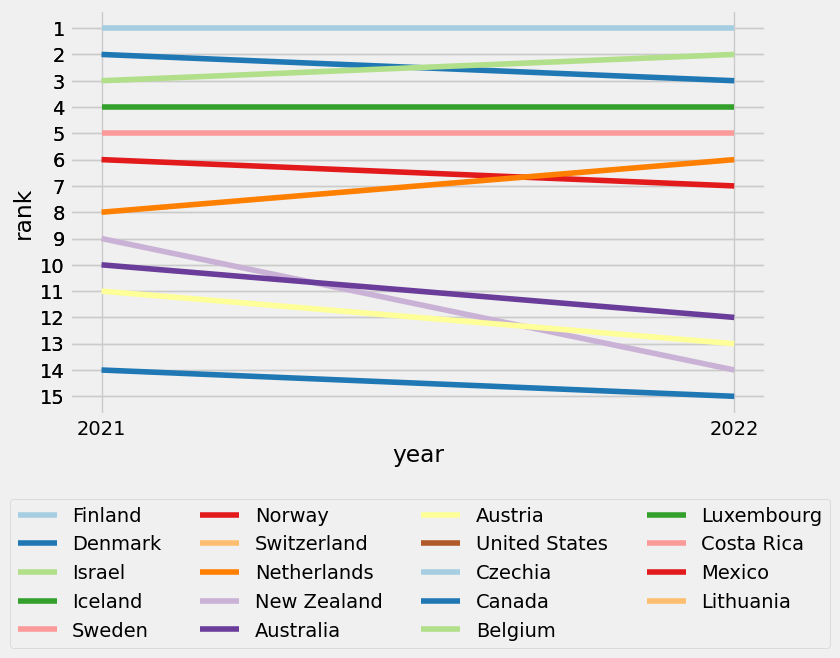

      Country name  year  Life Ladder  Freedom to make life choices  rank
32         Finland  2021     7.794378                      0.963190   1.0
26         Denmark  2021     7.698747                      0.933439   2.0
49          Israel  2021     7.577528                      0.819777   3.0
43         Iceland  2021     7.564625                      0.923243   4.0
102         Sweden  2021     7.439280                      0.953379   5.0
81          Norway  2021     7.361574                      0.936379   6.0
103    Switzerland  2021     7.327672                      0.907875   7.0
76     Netherlands  2021     7.314151                      0.856293   8.0
77     New Zealand  2021     7.136701                      0.910250   9.0
5        Australia  2021     7.111599                      0.912402  10.0
6          Austria  2021     7.079641                      0.794846  11.0
115  United States  2021     6.959088                      0.815735  12.0
25         Czechia  2021     6.942497 

In [530]:
# Q5-Show the change (positive or negative) in this year's 10 happiest countries, vs. last year's survey.
# Change of Top 10 2021 vs 2022
# Create a slope line graph
# Style
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,5))

# Dataframe
df_1 = df_happiness_2021.nsmallest(n=15, columns=["rank"])
df_2 = df_happiness_2022.nsmallest(n=15, columns=["rank"])

# Concat Dataframe
df_concat = pd.concat([df_1, df_2])
df_concat

# Plot
ax = sns.lineplot(data=df_concat, 
                  y="rank", 
                  x="year", 
                  hue="Country name",
                  palette=sns.color_palette("Paired"))
# Parameters
ax.invert_yaxis()
plt.legend(loc='lower left', bbox_to_anchor=(-0.1, -0.6), ncol=4)
plt.xticks([2021, 2022])
ax.set_yticks(df_concat["rank"][::1])
plt.show()

# Switzerland climbed up 1 notch 6th place from 8th place
# Norway and Denmark goes down 1 notch to 3rd and 7th place from 2nd and 6th place
# If we are going to look at beyond the top 10, New Zealand drop to 13th from 9th 
print(df_concat)

In [439]:
df_happiness_2022.head(n=2)


,Country name,year,Life Ladder,Freedom to make life choices,rank
0,Afghanistan,2022,1.281271,0.368377,114.0
1,Albania,2022,5.212213,0.802250,76.0


In [501]:
# Q6 -What countries, if any, are in top half of 2022 happiness score
# and in the bottom half of 2022's "freedom to make life choices"?

#  Filter 2022
df_2022 = df_happiness.loc[df_happiness["year"] == 2022][
    ["Country name", "year", "Life Ladder", "Freedom to make life choices"]
]

# Get the top half of the Happiest countries
df_happiest = df_2022.sort_values(by=["Life Ladder"], ascending=False)
df_length = int(df_happiest.shape[0]/2)
df_top_half_happiest = df_happiest.head(n=df_length)
df_top_half_happiest

,Country name,year,Life Ladder,Freedom to make life choices
637,Finland,2022,7.728998,0.958609
925,Israel,2022,7.662397,0.774947
521,Denmark,2022,7.544965,0.929547
830,Iceland,2022,7.448794,0.935669
1865,Sweden,2022,7.431214,0.939462
1395,Netherlands,2022,7.389636,0.868093
1484,Norway,2022,7.294604,0.939023
1166,Luxembourg,2022,7.227935,0.915110
459,Costa Rica,2022,7.076658,0.910026
1277,Mexico,2022,7.038369,0.860889


In [500]:
# Q6 -What countries, if any, are in top half of 2022 happiness score
# and in the bottom half of 2022's "freedom to make life choices"?

# Get the bottom half of "freedom to make life choices"  
df_freedom = df_2022.sort_values(by=["Freedom to make life choices"], ascending=True)
df_bot_half_freedom = df_freedom.head(n=df_length)
df_bot_half_freedom

,Country name,year,Life Ladder,Freedom to make life choices
13,Afghanistan,2022,1.281271,0.368377
1117,Lebanon,2022,2.352428,0.449575
1979,Tunisia,2022,4.260868,0.474189
420,Comoros,2022,3.545204,0.480554
1178,Madagascar,2022,4.019134,0.523493
737,Greece,2022,5.900459,0.562556
879,Iran,2022,4.976995,0.570203
474,Croatia,2022,5.578691,0.593486
670,Gambia,2022,4.279441,0.599087
1251,Mauritania,2022,4.723869,0.624029


In [512]:
# Q6 -What countries, if any, are in top half of 2022 happiness score
# and in the bottom half of 2022's "freedom to make life choices"?

# Do a merge on inner to filter common countries 
df_merge = df_top_half_happiest.merge(df_bot_half_freedom, how="inner", validate="1:1", indicator=True)
df_merge.sort_values(by=["Freedom to make life choices"]).reset_index(drop=True)

# There are 15 countries that are in top half of 2022 happiness score
# and in the bottom half of 2022's "freedom to make life choices"

,Country name,year,Life Ladder,Freedom to make life choices,_merge
0,Greece,2022,5.900459,0.562556,both
1,Lithuania,2022,7.037577,0.709662,both
2,Italy,2022,6.258477,0.710519,both
3,South Korea,2022,5.950014,0.723480,both
4,United States,2022,6.692790,0.735640,both
5,Peru,2022,5.892069,0.764267,both
6,Venezuela,2022,5.948992,0.770417,both
7,Israel,2022,7.662397,0.774947,both
8,Russia,2022,6.044073,0.776064,both
9,Spain,2022,6.336902,0.781409,both
